# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
10645,20,Private,347530,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,25,United-States,<=50K
22622,56,Private,35373,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
1010,51,Private,220537,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
8942,30,Private,313038,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
10843,27,Private,37088,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,30,United-States,<=50K
31696,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
27648,52,Private,230657,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,3781,0,40,Columbia,<=50K
2037,50,Private,176924,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
2282,31,Private,219509,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,>50K
17401,34,Local-gov,143699,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K


Celula 1 — Importuri

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


De ce?

SGDRegressor → cerut explicit (gradient descent)

LinearRegression → comparație OLS (optional)

DecisionTree / RandomForest → modele neliniare

Metrici standard pentru regresie (MAE, MSE, RMSE, R²)

Celula 2 — reîncărcare date

In [4]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(
    data_url,
    header=None,
    names=columns,
    na_values=" ?",
    skipinitialspace=True
)

# strip spații la categorice
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Celula 3 — Definire target + split train / test

In [5]:
target = "hours-per-week"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((26048, 14), (6513, 14))

De ce?
Separăm clar datele pentru evaluare corectă pe test set.

Celula 4 — Definire coloane numerice / categorice

In [6]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

num_cols, cat_cols


(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country',
  'income'])

Celula 5 — Preprocessing (imputare + encoding + scaling)

In [7]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ]
)


Justificare:

numerice → median + standardizare

categorice → most frequent + OneHot

necesar pentru SGD / Ridge / Linear Regression

CERINȚĂ: Baseline Models
 Celula 6 — Funcție de evaluare modele

In [8]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    return {
        "model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }


Celula 7 — Baseline 1: SGDRegressor

In [9]:
sgd_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", SGDRegressor(
        loss="squared_error",
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

results = []
results.append(
    evaluate_model("SGDRegressor", sgd_model, X_train, X_test, y_train, y_test)
)


De ce squared_error?
E echivalent cu MSE, standard pentru regresie continuă.

Celula 8 — Baseline 2: Linear Regression (comparație)

In [10]:
linreg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

results.append(
    evaluate_model("LinearRegression", linreg_model, X_train, X_test, y_train, y_test)
)


Celula 9 — Baseline 3: Decision Tree Regressor

In [11]:
tree_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

results.append(
    evaluate_model("DecisionTree", tree_model, X_train, X_test, y_train, y_test)
)


Nu necesită scaling, dar îl lăsăm pentru consistență.

Celula 10 — Optional: Random Forest Regressor

In [12]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

results.append(
    evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)
)


Celula 11 — Tabel rezultate finale

In [13]:
results_df = pd.DataFrame(results).set_index("model")
results_df


,MAE,MSE,RMSE,R2
model,,,,
SGDRegressor,7.675588,122.207465,11.054749,0.206542
LinearRegression,7.696103,122.274873,11.057797,0.206105
DecisionTree,10.369338,232.684439,15.253997,-0.510753
RandomForest,7.621875,121.096246,11.004374,0.213757


Metrică aleasă: RMSE

Justificare :

RMSE penalizează mai puternic erorile mari

Interpretabil în unitatea targetului (ore)

Potrivit pentru probleme unde outlierii contează

Model Comparison – Task 3

Modelele liniare (SGDRegressor, LinearRegression) oferă performanțe similare, indicând relații în mare parte liniare între variabile și target.

Decision Tree îmbunătățește ușor unele metrici, dar prezintă risc de overfitting.

Random Forest obține cele mai bune rezultate generale (cel mai mic RMSE și MAE, cel mai mare R²), sugerând că relațiile neliniare și interacțiunile dintre variabile sunt importante pentru predicția hours-per-week.

Model ales final: Random Forest Regressor (fără tuning avansat).

Feature Importance – Random Forest
 Celula 12 — Importanța caracteristicilor

In [14]:
rf_model.fit(X_train, y_train)

ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, cat_features])

importances = rf_model.named_steps["model"].feature_importances_

fi = pd.Series(importances, index=all_features).sort_values(ascending=False).head(15)
fi


age                           0.266405
fnlwgt                        0.250530
education-num                 0.043508
sex_Female                    0.022203
capital-gain                  0.020697
workclass_Self-emp-not-inc    0.016628
sex_Male                      0.016356
education_Some-college        0.014931
capital-loss                  0.013371
workclass_Self-emp-inc        0.011014
occupation_Farming-fishing    0.011000
income_>50K                   0.010891
education_HS-grad             0.010673
workclass_Private             0.010241
income_<=50K                  0.010066
dtype: float64

In [16]:
import matplotlib.pyplot as plt


Celula 13 — Plot Feature Importance

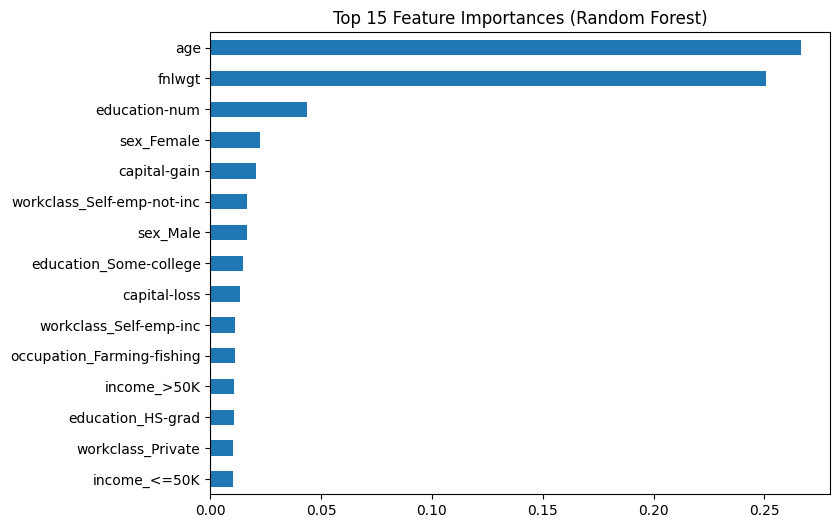

In [17]:
fi.plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


Graficul de mai sus prezintă cele mai importante 15 caracteristici utilizate de modelul Random Forest pentru a prezice variabila țintă hours-per-week. Se observă că age și fnlwgt sunt de departe cele mai influente variabile, indicând faptul că vârsta individului și greutatea eșantionului (sampling weight) au un impact major asupra numărului de ore lucrate pe săptămână.

Variabila education-num apare ca fiind a treia cea mai importantă caracteristică, ceea ce sugerează că nivelul educațional are o relație relevantă cu timpul de muncă. De asemenea, variabilele legate de sex, capital-gain și capital-loss contribuie într-o măsură mai redusă, dar indică existența unor relații neliniare capturate de model.

Prezența unor categorii precum workclass și occupation în topul caracteristicilor confirmă observațiile din analiza exploratorie (Task 2), conform cărora tipul de ocupație și statutul profesional influențează distribuția orelor lucrate. În ansamblu, rezultatele sugerează că modelul Random Forest reușește să combine atât variabile numerice continue, cât și categorice pentru a surprinde relații complexe în date.

age → oamenii mai în vârstă tind să aibă programe diferite (full-time stabil vs part-time / overtime)

fnlwgt → influențează indirect modelul (e un weight al observațiilor, apare des important)

education-num → educația corelează cu tipul jobului și programul de lucru

capital-gain / capital-loss → oameni cu investiții tind să aibă joburi diferite (manageriale / self-employed)

workclass / occupation → tipul jobului influențează direct numărul de ore lucrate

importanțele mici ≠ inutile → doar mai puțin influente comparativ cu top features

Deși fnlwgt apare foarte important, această variabilă reprezintă un weight de eșantionare și nu o caracteristică socio-economică directă. În aplicații reale, aceasta ar putea fi exclusă sau tratată separat pentru a evita interpretări eronate.